In [2]:
from model_t1 import *

In [3]:
args_dict = {
    'seed' : 42,
    'dataset' : 'idda',
    'model' : 'deeplabv3_mobilenetv2',
    'mode' : 'val',
    'da' : 'basic',
    'bs' : 4,
    'nw' : 2,
    'lrs' : [0.1, 0.01, 0.001, 0.0001],       
    'wds' : [0.0001, 0.00001, 0],       
    'opt' : 'Adam',
    'm' : 0.9,
    'policy' : 'None',                    
    'lr_power' : 0.2, 
    'lr_step' : 15,
    'lr_factor' : 0.1,
    'num_epochs' : 5,
    'n_exp' : 1,
    'Adam_p' : 'dft'
}

args = get_parser(args_dict)

In [6]:
train_datasets, test_datasets = get_datasets(args)
train_dataset = ConcatDataset(train_datasets)

print(f" \n Dataset type: {type(train_datasets[0])}, {train_dataset}")

 
 Dataset type: <class 'datasets.idda.IDDADataset'>, <torch.utils.data.dataset.ConcatDataset object at 0x000002BD453309D0>


In [7]:
train_dataset, valid_dataset = train_test_split(train_dataset, test_size=0.2, random_state=42)

print(f" \n Dataset type: {type(train_dataset)}")

 
 Dataset type: <class 'list'>


In [12]:
print(type([train_dataset[0][0]]))

<class 'list'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


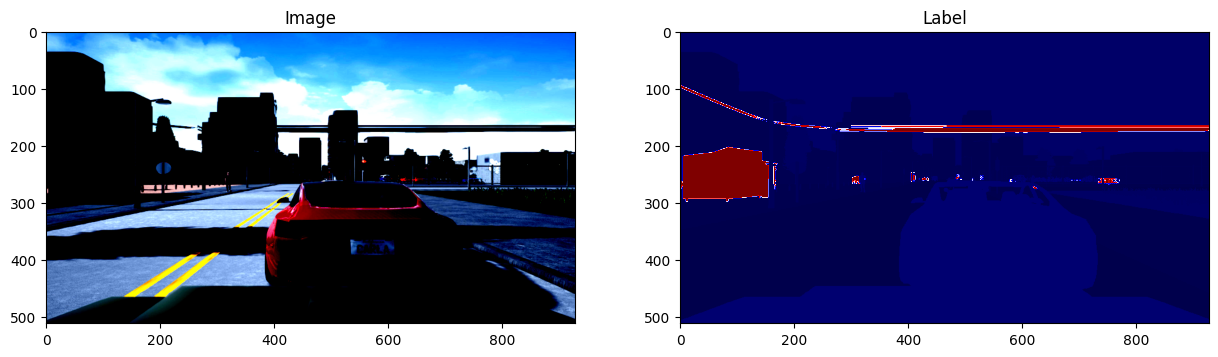

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

idx = 27
image, label = train_dataset[idx][0], train_dataset[idx][1]

plt.figure(figsize=(15, 7.5))
plt.subplot(121)
plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
plt.title("Image")
plt.subplot(122)
plt.imshow(label, cmap=cm.seismic)
plt.title("Label")
plt.show()

In [56]:
print(type(train_datasets[0]))
print(len(train_datasets[0]))

<class 'datasets.idda.IDDADataset'>
25


In [1]:
from main import *

In [2]:
args_dict = {    
    'seed' : 42,
    'dataset' : 'idda',
    'model' : 'deeplabv3_mobilenetv2',
    'num_rounds' : 2,
    'num_epochs' : 2,
    'clients_per_round' : 5,            #DO NOT CHANGE
    'hnm' : False,
    'lr' : 0.001,
    'bs' : 4,
    #'nw' : 2,
    'wd' : 0.00001,
    'da' : 'basic',
    'lr_step' : 15,
    'lr_factor' : 0.1,
    'eval_interval' : 5,
    'test_interval' : 5
}

args = get_parser(args_dict)

In [7]:
train_datasets, test_datasets = get_datasets(args)
print(type(train_datasets), type(train_datasets[0]))
print(type(test_datasets), type(test_datasets[0]), type(test_datasets[0][0]))

"""
train_datasets -> list of IddaDatasets, one for each client, with name=client_id
test_datasets -> list of 2 IddaDatasets, called respectively test_same_dom and test_diff_dom
"""

<class 'list'> <class 'datasets.idda.IDDADataset'>
<class 'list'> <class 'datasets.idda.IDDADataset'> <class 'tuple'>


# GTAV TESTS

In [1]:
def get_mapping():
        mapping = np.zeros((256,), dtype=np.int64) + 255
        for k, v in class_map.items():
            mapping[k] = v
        return lambda x: from_numpy(mapping[x])

In [2]:
class_map = {
   1: 13,  # ego_vehicle : vehicle
   7: 0,   # road
   8: 1,   # sidewalk
   11: 2,  # building
   12: 3,  # wall
   13: 4,  # fence
   17: 5,  # pole
   18: 5,  # poleGroup: pole
   19: 6,  # traffic light
   20: 7,  # traffic sign
   21: 8,  # vegetation
   22: 9,  # terrain
   23: 10,  # sky
   24: 11,  # person
   25: 12,  # rider
   26: 13,  # car : vehicle
   27: 13,  # truck : vehicle
   28: 13,  # bus : vehicle
   32: 14,  # motorcycle
   33: 15,  # bicycle
}

In [6]:
import numpy as np
import torch
from torch import from_numpy

transform = get_mapping()

t = torch.Tensor(torch.arange(1, 50))

t2 = transform(t)

print(t)
print(t2)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
tensor([ 13, 255, 255, 255, 255, 255,   0,   1, 255, 255,   2,   3,   4, 255,
        255, 255,   5,   5,   6,   7,   8,   9,  10,  11,  12,  13,  13,  13,
        255, 255, 255,  14,  15, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255])


In [15]:

from torch.utils.data import DataLoader
from main import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
with open("data/GTAV+Cityscapes/data/GTA5/train.txt",'r') as f:
    list_samples = [line.rstrip('\n') for line in f]

print(list_samples)
len(list_samples)

['08688.png', '16742.png', '11851.png', '02463.png', '11863.png', '18668.png', '15387.png', '01700.png', '05999.png', '24387.png', '14842.png', '08670.png', '21664.png', '14287.png', '12964.png', '04201.png', '07109.png', '10877.png', '01160.png', '02113.png', '04765.png', '08805.png', '16496.png', '20002.png', '07256.png', '09338.png', '10993.png', '01782.png', '19456.png', '19841.png', '10316.png', '21548.png', '14470.png', '22991.png', '14207.png', '23751.png', '05228.png', '14684.png', '08267.png', '11587.png', '05363.png', '08624.png', '00828.png', '03188.png', '21486.png', '07566.png', '20132.png', '03641.png', '08345.png', '18936.png', '14625.png', '24471.png', '10103.png', '24431.png', '00074.png', '07328.png', '24282.png', '05749.png', '16417.png', '13710.png', '00993.png', '11397.png', '19772.png', '10164.png', '12025.png', '06635.png', '08872.png', '23724.png', '21825.png', '17474.png', '22316.png', '01634.png', '17278.png', '08982.png', '16484.png', '10402.png', '02937.png'

500

In [9]:
train_transforms = sstr.Compose([
                sstr.RandomResizedCrop((512, 928), scale=(0.5, 2.0)),
                sstr.ToTensor(),
                sstr.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])

In [10]:
ds = GTAV(root="data/GTAV+Cityscapes/data/GTA5",list_samples = list_samples,transform=train_transforms)

In [11]:
dataloader = DataLoader(ds,shuffle=False,drop_last=True,batch_size=4,num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


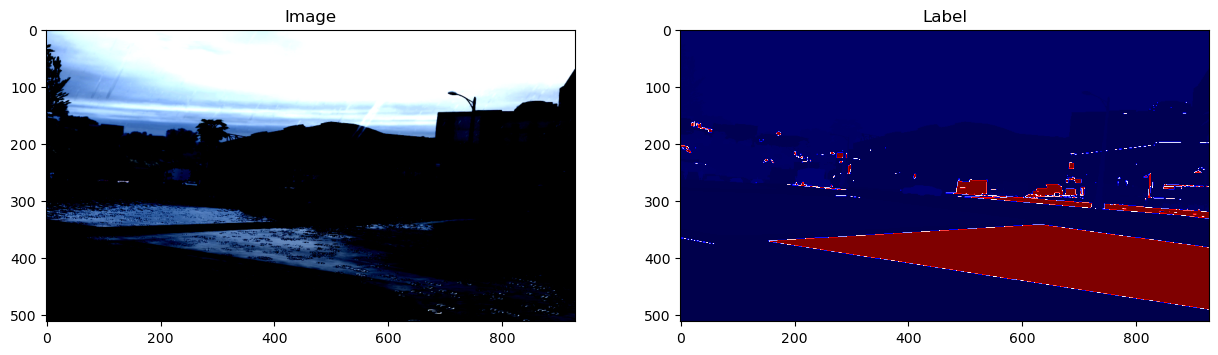

In [23]:
for i, (images,labels) in enumerate(dataloader):
    image, label = images[1],labels[1]
    plt.figure(figsize=(15, 7.5))
    plt.subplot(121)
    plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
    plt.title("Image")
    plt.subplot(122)
    plt.imshow(label, cmap=cm.seismic)
    plt.title("Label")
    plt.show()

    if i == 0:
        break

# TEST SPLIT T1

In [9]:
from model_t1 import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [24]:
args_dict = {
    'seed' : 42,
    'dataset' : 'idda',
    'model' : 'deeplabv3_mobilenetv2',
    'mode' : 'val',
    'da' : 'advanced',
    'bs' : 4,
    'nw' : 0,
    'lrs' : [0.1, 0.01, 0.001, 0.0001],       
    'wds' : [0.0001, 0.00001, 0],       
    'opt' : 'Adam',
    'm' : 0.9,
    'policy' : 'None',                    
    'lr_power' : 0.2, 
    'lr_step' : 15,
    'lr_factor' : 0.1,
    'num_epochs' : 5,
    'n_exp' : 1,
    'Adam_p' : 'dft',
    'final_ratio': 0.05
}
args = get_parser(args_dict)

In [21]:
print(' Generating datasets...')
train_datasets, test_datasets = get_datasets(args)
train_dataset = ConcatDataset(train_datasets)
print(' ...done')
#datalaoders
if args.mode == 'val':
    print(" Splitting the training set...")
    train_size = int(len(train_dataset)*0.8)
    valid_size = len(train_dataset)-train_size
    train_dataset, valid_dataset = random_split(train_dataset,[train_size,valid_size])
    print(" ...done")
    valid_loader = DataLoader(valid_dataset, batch_size=args.bs, shuffle=False, num_workers=args.nw)
train_loader = DataLoader(train_dataset, batch_size=args.bs, shuffle=False, num_workers=args.nw, drop_last=True)

 Generating datasets...
 ...done
 Splitting the training set...
 ...done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


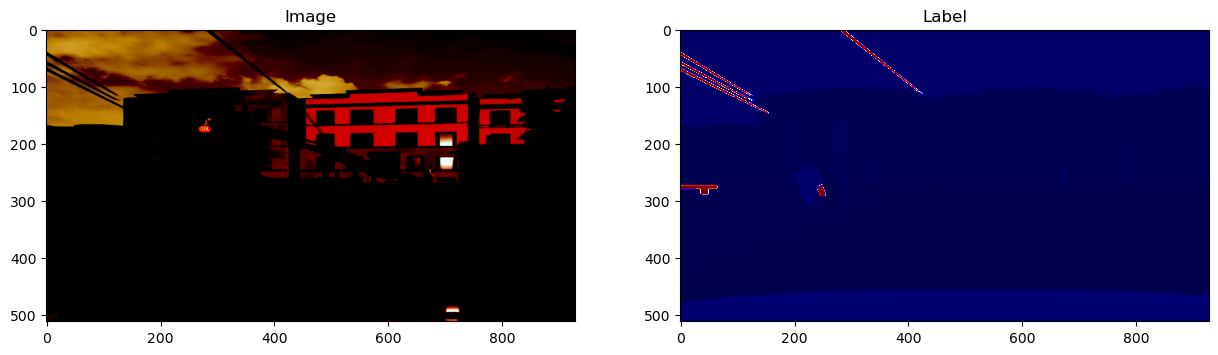

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


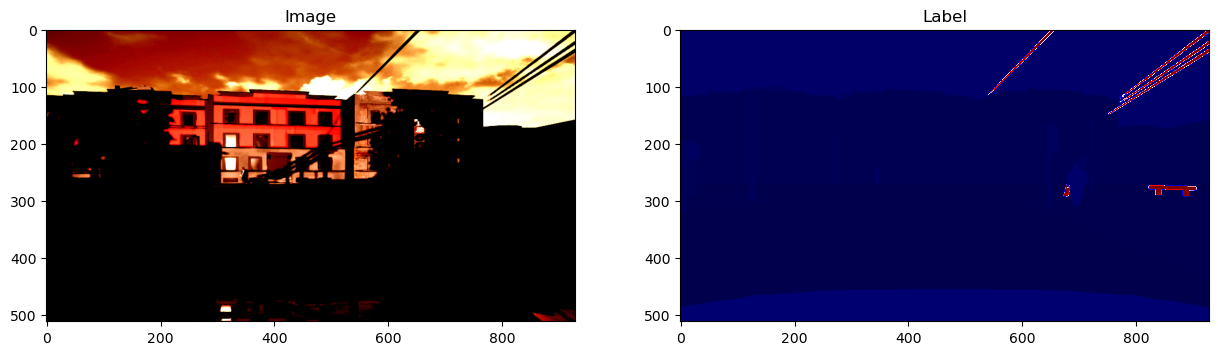

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


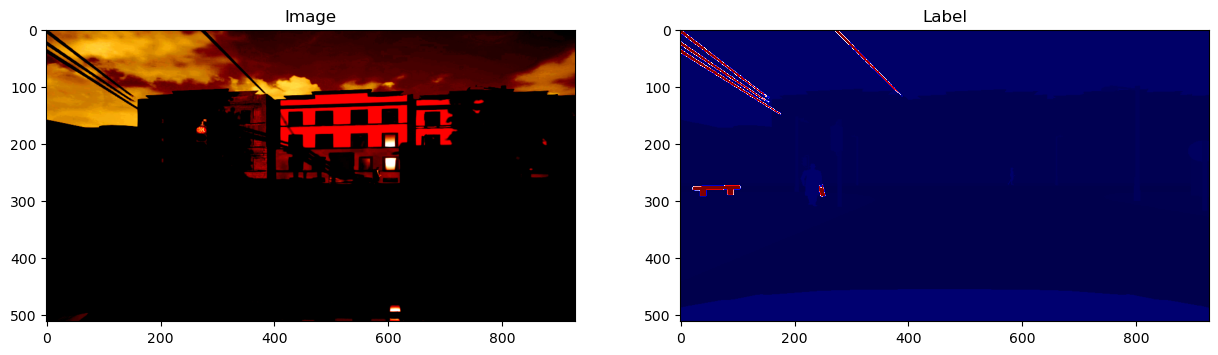

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


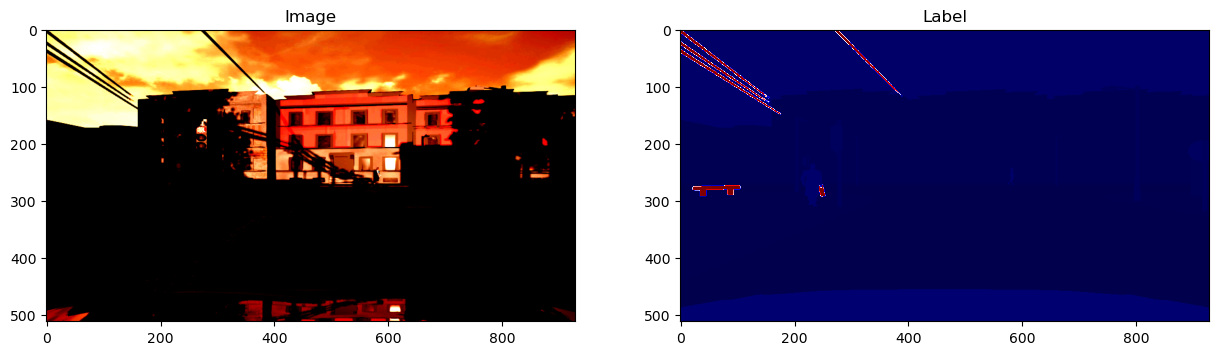

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


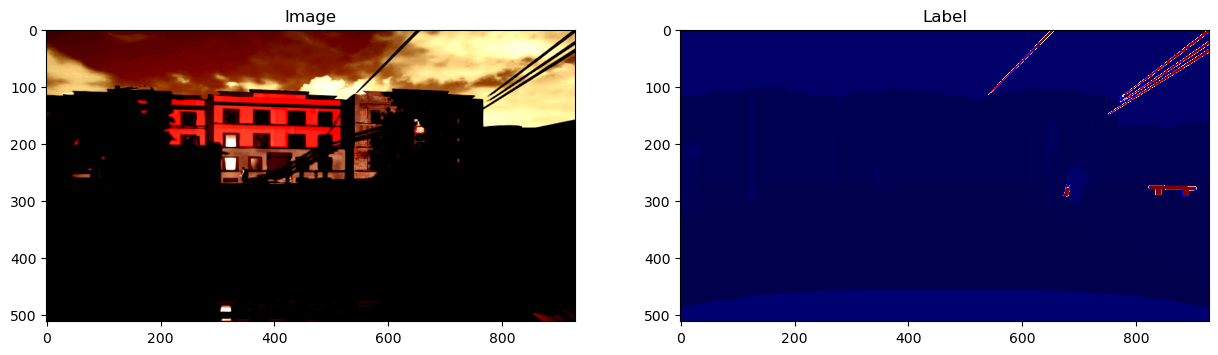

In [22]:
for j in range(5):
    for i, (images,labels) in enumerate(train_loader):
        image, label = images[0],labels[0]
        plt.figure(figsize=(15, 7.5))
        plt.subplot(121)
        plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
        plt.title("Image")
        plt.subplot(122)
        plt.imshow(label, cmap=cm.seismic)
        plt.title("Label")
        plt.show() 
        break



# TEST FOR FDA

In [1]:
from model_t3 import *
from datasets.gtav import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
train_transforms = sstr.Compose([
                     #as seen in FedDrive
                sstr.ToTensor()
                
            ])


root = 'data/idda'
with open(os.path.join(root, 'train.json'), 'r') as f:
    all_data = json.load(f)

client_id  = list(all_data.keys())[5]

dataset = IDDADataset(root=root, list_samples=all_data[client_id], transform=train_transforms,client_name=client_id)

In [19]:
style_augment = StyleAugment(n_images_per_style = -1, L = 0.01)
style_augment.add_style(dataset,name = client_id)

In [24]:
with open("data/GTAV+Cityscapes/data/GTA5/train.txt",'r') as f:
    list_samples = [line.rstrip('\n') for line in f]
gta_ds = GTAVDataset(root="data/GTAV+Cityscapes/data/GTA5",list_samples = list_samples,transform=train_transforms)

In [25]:
data_loader = DataLoader(gta_ds,batch_size=4,shuffle=False)

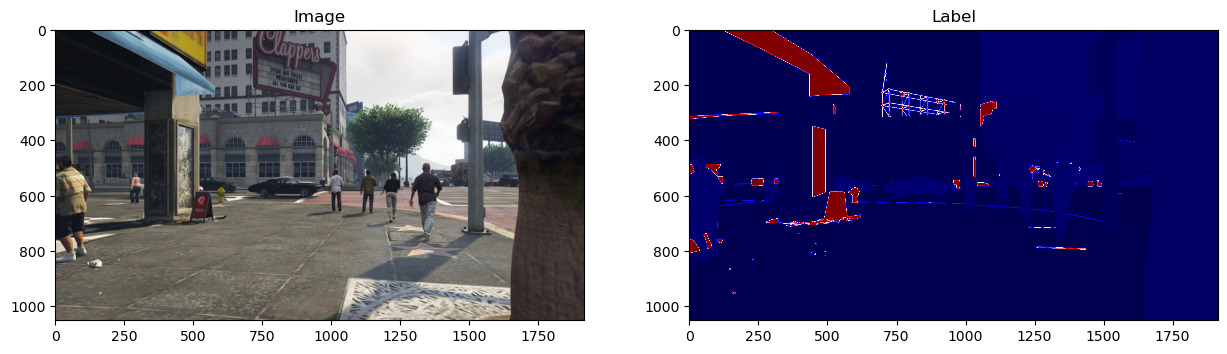

In [26]:
for i, (images,labels) in enumerate(data_loader):
    image, label = images[0],labels[0]
    plt.figure(figsize=(15, 7.5))
    plt.subplot(121)
    plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
    plt.title("Image")
    plt.subplot(122)
    plt.imshow(label, cmap=cm.seismic)
    plt.title("Label")
    plt.show() 
    break

In [27]:
data_loader.dataset.style_augment = style_augment

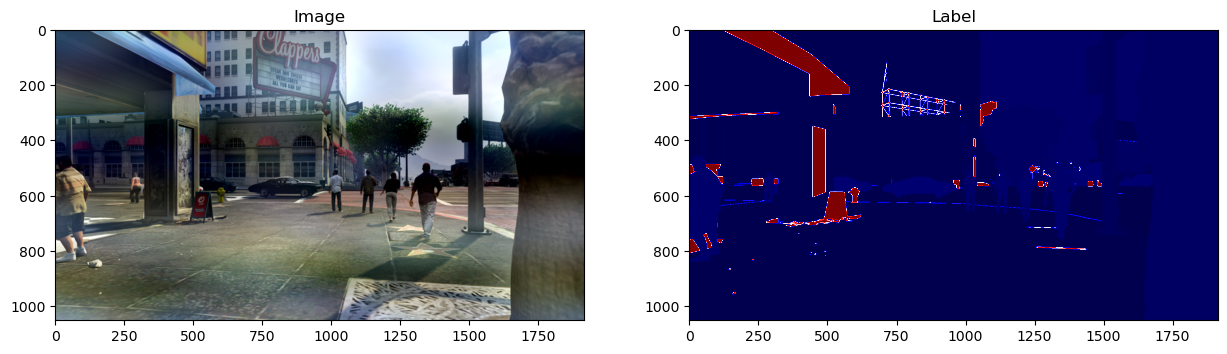

In [28]:
for i, (images,labels) in enumerate(data_loader):
    image, label = images[0],labels[0]
    plt.figure(figsize=(15, 7.5))
    plt.subplot(121)
    plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
    plt.title("Image")
    plt.subplot(122)
    plt.imshow(label, cmap=cm.seismic)
    plt.title("Label")
    plt.show() 
    break

In [30]:
data_loader_client = DataLoader(dataset,batch_size=1, shuffle=False)

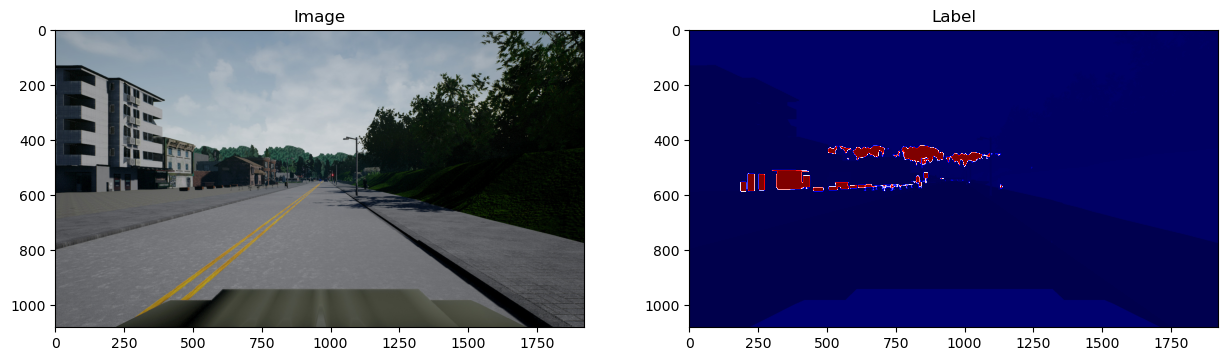

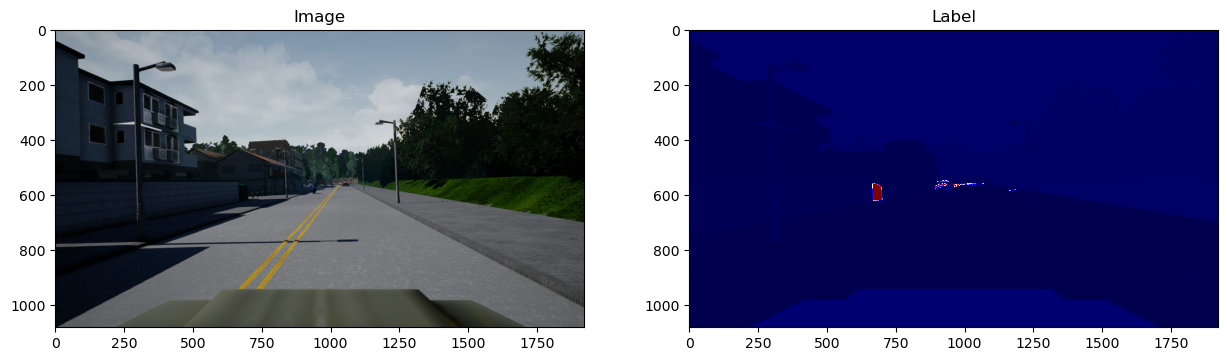

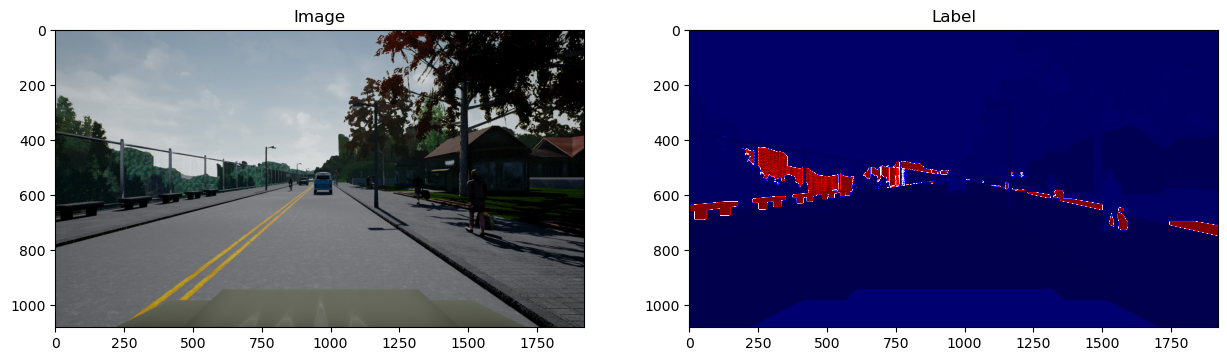

In [31]:
for i, (images,labels) in enumerate(data_loader_client):
    image, label = images[0],labels[0]
    plt.figure(figsize=(15, 7.5))
    plt.subplot(121)
    plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
    plt.title("Image")
    plt.subplot(122)
    plt.imshow(label, cmap=cm.seismic)
    plt.title("Label")
    plt.show() 
    if i == 2:
        break

## New Test FDA

In [3]:
from model_t3 import *
from datasets.gtav import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [19]:
def plot_img(image, beta = None):
    plt.figure(figsize=(8, 4))
    plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
    if beta == None:
        plt.title("Image")
    else:
        plt.title(f"Image || Beta: {beta}")

In [4]:
train_transforms = sstr.Compose([
                     #as seen in FedDrive
                sstr.ToTensor()
                
            ])

root = 'data/idda'
with open(os.path.join(root, 'train.json'), 'r') as f:
    all_data = json.load(f)

#Client and dataset extraction 
client_id  = list(all_data.keys())[5]
dataset = IDDADataset(root=root, list_samples=all_data[client_id], transform=train_transforms,client_name=client_id)

In [28]:
#Loading the GTAV dataset
with open("data/GTAV+Cityscapes/data/GTA5/train.txt",'r') as f:
    list_samples = [line.rstrip('\n') for line in f]
gta_ds = GTAVDataset(root="data/GTAV+Cityscapes/data/GTA5",list_samples = list_samples,transform=train_transforms)


In [32]:
betas = [0.0001,0.001,0.01, 0.05, 0.09,0.49, 0.51, 0.9]

100%|██████████| 25/25 [00:02<00:00,  9.90it/s]


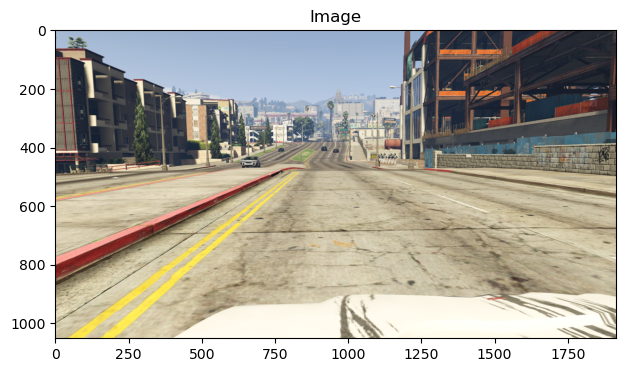

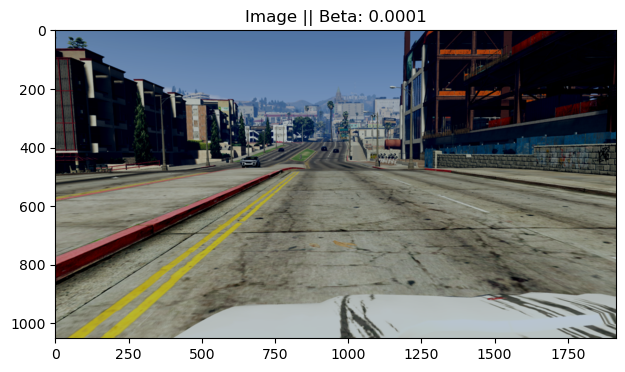

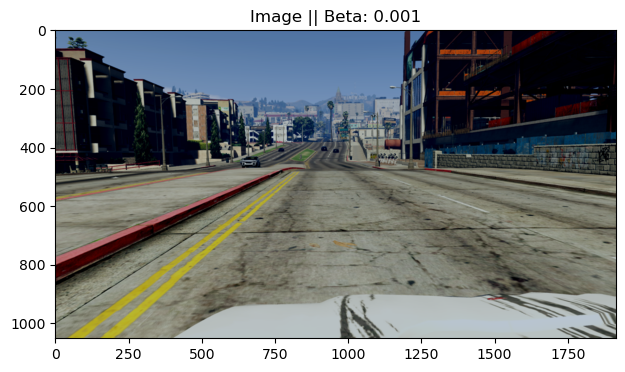

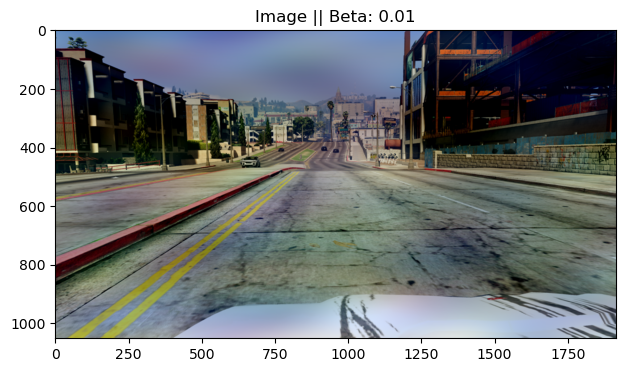

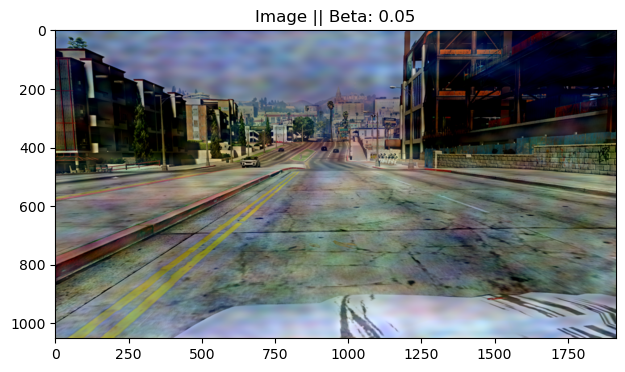

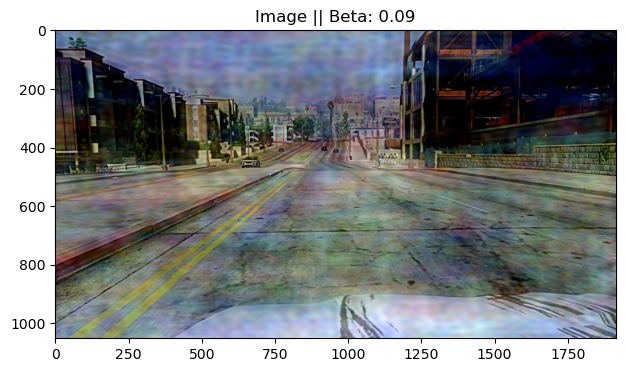

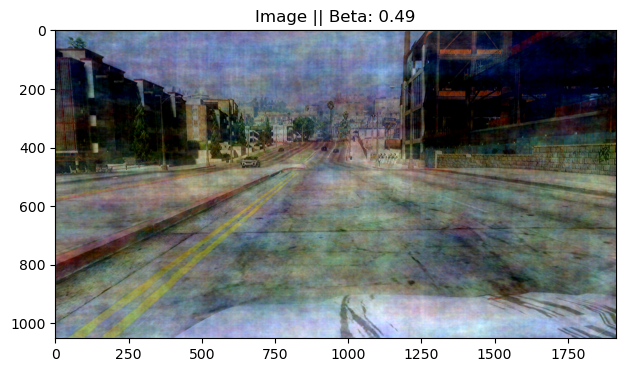

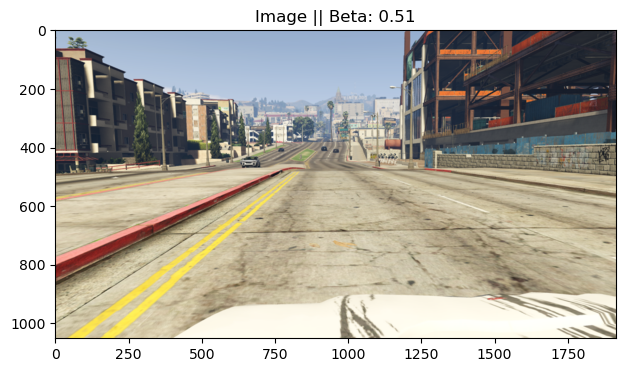

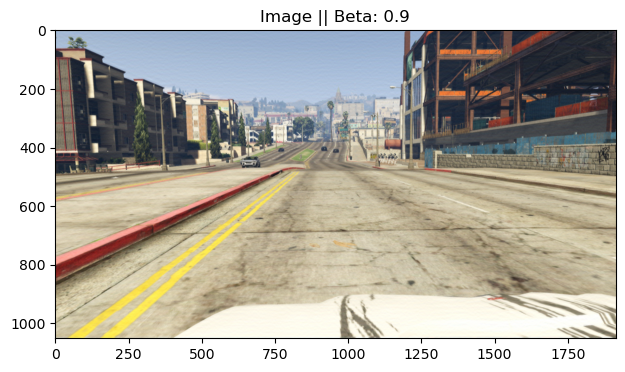

In [33]:
gta_ds.style_augment = None

index = 3
img_native,lbl_native = gta_ds[index]

plot_img(img_native)

for beta in betas:
    style_augment = StyleAugment(n_images_per_style = -1, L = beta)
    style_augment.add_style(dataset,name = client_id)
    gta_ds.style_augment = style_augment
    plot_img(gta_ds[index][0],beta=beta)    